<center>

# <span style="color:red"> Studio dimensione blocchi </span>

</center>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

## Esempio di determinazione dimensione blocco

In [3]:
obs = np.loadtxt("sim/lblk_t0.5_size1000_seed1.out")
magn = obs[:, 2]


err = np.zeros(200)

#Ciclo per le varie lunghezze dei blocchi
for i in range(5, 1001, 5):
    m = 0
    m2 = 0
    
    # Ciclo per l'errore a lunghezza del blocco fissata
    for j in range(0, math.floor(len(magn)/i)):
        mblk = 0
        m2blk = 0

        # Stima nel singolo blocco
        for k in range(0, i):
            mblk += magn[i * j + k]/i

        m = m * j/(j+1)+  mblk/(j+1)
        m2 = m2 * j/(j+1)+  mblk*mblk/(j+1)
    
    err[math.floor(i/5)-1] = math.sqrt((m2 - m**2)/(math.floor(len(magn)/i)-1))

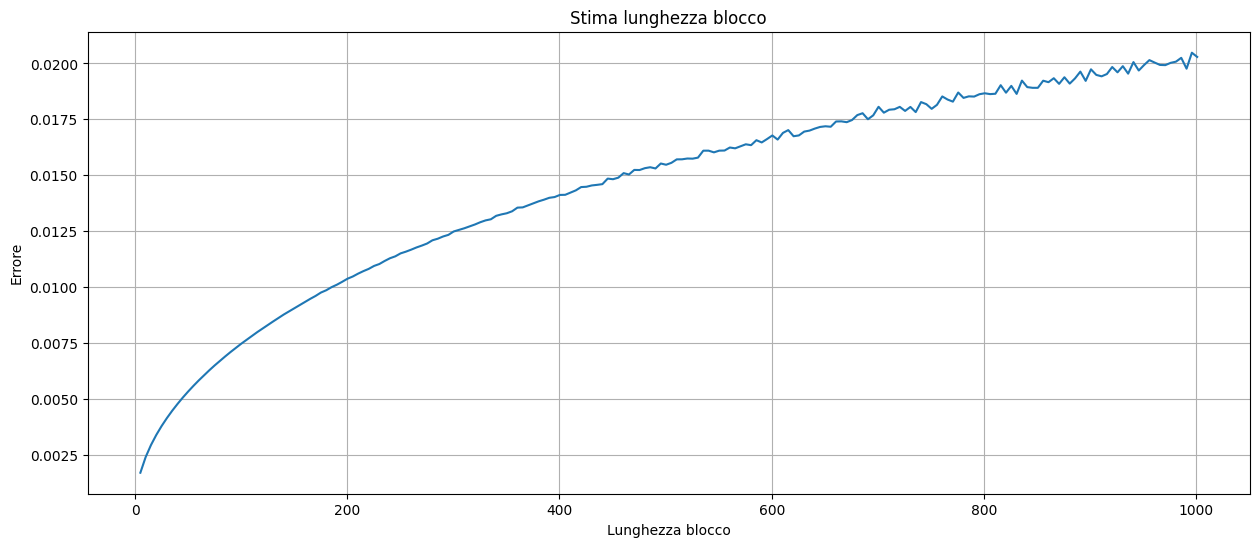

In [4]:
fig = plt.figure(figsize=(15, 6))

plt.plot(np.linspace(5, 1001, 200), err)
plt.title("Stima lunghezza blocco")
plt.ylabel('Errore')
plt.xlabel('Lunghezza blocco')
plt.grid()

plt.show()             

## Studio sistematico spazio dei parametri

In [3]:
def err_lblk(x, lmax, sp_camp):
    err = np.zeros(200)

    #Ciclo per le varie lunghezze dei blocchi
    for i in range(5, lmax, sp_camp):
        m = 0
        m2 = 0

        # Ciclo per l'errore a lunghezza del blocco fissata
        for j in range(0, math.floor(len(x)/i)):
            mblk = 0
            m2blk = 0

            # Stima nel singolo blocco
            for k in range(0, i):
                mblk += x[i * j + k]/i

            m = m * j/(j+1)+  mblk/(j+1)
            m2 = m2 * j/(j+1)+  mblk*mblk/(j+1)

        err[math.floor(i/sp_camp)-1] = math.sqrt((m2 - m**2)/(math.floor(len(x)/i)-1))
    
    return err

In [4]:
temp_t = np.array(['0.5', '1.0', '1.5', '2.0'])
size_t = np.array(['1000', '3000', '6000', '10000'])
seed_t = np.array(['1', '2', '3', '4'])

lmax = 4001
sp_camp = 20

err = np.zeros(shape = (4, 200))

for size in size_t:
    for i in range(0, len(temp_t)):
        for j in range(0, len(seed_t)):
        
            # Leggo il file
            fname = 'sim/lblk_t' + temp_t[i] + '_size' + size + '_seed'+ seed_t[j] +'.out'
            obs = np.loadtxt(fname)
            magn = obs[:, 2]

            # Calcolo dell'errore e memorizzazione
            err[j, :] = err_lblk(magn, lmax, sp_camp)
        print("Calcolato errore: N = " + size + ", T = " + temp_t[i])

        fout = 'err/errM_size' + size + '_t' + temp_t[i] + '.dat'
        np.savetxt(fout, err.T, delimiter=' ', fmt='%.6f')

Calcolato errore: N = 1000, T = 0.5
Calcolato errore: N = 3000, T = 0.5
Calcolato errore: N = 6000, T = 0.5
Calcolato errore: N = 10000, T = 0.5
